In [1]:
!pip install kaggle

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
files.upload()  # Upload 'kaggle.json'

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d tongpython/cat-and-dog

!unzip cat-and-dog.zip -d data

Streaming output truncated to the last 5000 lines.
  inflating: data/training_set/training_set/cats/cat.3704.jpg  
  inflating: data/training_set/training_set/cats/cat.3705.jpg  
  inflating: data/training_set/training_set/cats/cat.3706.jpg  
  inflating: data/training_set/training_set/cats/cat.3707.jpg  
  inflating: data/training_set/training_set/cats/cat.3708.jpg  
  inflating: data/training_set/training_set/cats/cat.3709.jpg  
  inflating: data/training_set/training_set/cats/cat.371.jpg  
  inflating: data/training_set/training_set/cats/cat.3710.jpg  
  inflating: data/training_set/training_set/cats/cat.3711.jpg  
  inflating: data/training_set/training_set/cats/cat.3712.jpg  
  inflating: data/training_set/training_set/cats/cat.3713.jpg  
  inflating: data/training_set/training_set/cats/cat.3714.jpg  
  inflating: data/training_set/training_set/cats/cat.3715.jpg  
  inflating: data/training_set/training_set/cats/cat.3716.jpg  
  inflating: data/training_set/training_set/cats/cat.3

In [4]:
!mkdir -p data/train/cats data/train/dogs data/validation/cats data/validation/dogs

In [5]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths
dataset_path = 'data/training_set/training_set/'
cat_files = os.listdir(dataset_path + 'cats')
dog_files = os.listdir(dataset_path + 'dogs')

# Split into training and validation sets
train_cats, val_cats = train_test_split(cat_files, test_size=0.2, random_state=42)
train_dogs, val_dogs = train_test_split(dog_files, test_size=0.2, random_state=42)

# Move files to respective directories
for file in train_cats:
    shutil.move(dataset_path + 'cats/' + file, 'data/train/cats/')
for file in val_cats:
    shutil.move(dataset_path + 'cats/' + file, 'data/validation/cats/')
for file in train_dogs:
    shutil.move(dataset_path + 'dogs/' + file, 'data/train/dogs/')
for file in val_dogs:
    shutil.move(dataset_path + 'dogs/' + file, 'data/validation/dogs/')

## Data Augmentation

In [6]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load training and validation datasets
train_generator = train_datagen.flow_from_directory(
    'data/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = val_datagen.flow_from_directory(
    'data/validation',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 6402 images belonging to 2 classes.
Found 1603 images belonging to 2 classes.


## Build the CNN Model

In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

## Train the Model

In [8]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


200/200 ━━━━━━━━━━━━━━━━━━━━ 60s 257ms/step - accuracy: 0.5252 - loss: 0.7189 - val_accuracy: 0.6031 - val_loss: 0.6560
Epoch 2/10
  1/200 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.6250 - loss: 0.6456

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6250 - loss: 0.6456 - val_accuracy: 0.6667 - val_loss: 0.6208
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 71s 234ms/step - accuracy: 0.6066 - loss: 0.6603 - val_accuracy: 0.6619 - val_loss: 0.6105
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - accuracy: 0.6562 - loss: 0.6119 - val_accuracy: 0.6667 - val_loss: 0.6312
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 45s 221ms/step - accuracy: 0.6278 - loss: 0.6456 - val_accuracy: 0.7100 - val_loss: 0.5696
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5312 - loss: 0.7309 - val_accuracy: 0.6667 - val_loss: 0.6129
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 46s 224ms/step - accuracy: 0.6574 - loss: 0.6109 - val_accuracy: 0.7113 - val_loss: 0.5660
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 87us/step - accuracy: 0.7188 - loss: 0.5222 - val_accuracy: 0.6667 - val_loss: 0.6914
Epoch 9/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 81s 221ms/step - accuracy: 0.6690 - loss: 0.5991 - val_accuracy

## Evaluate the Model

51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.6792 - loss: 0.5907
Validation Accuracy: 0.70


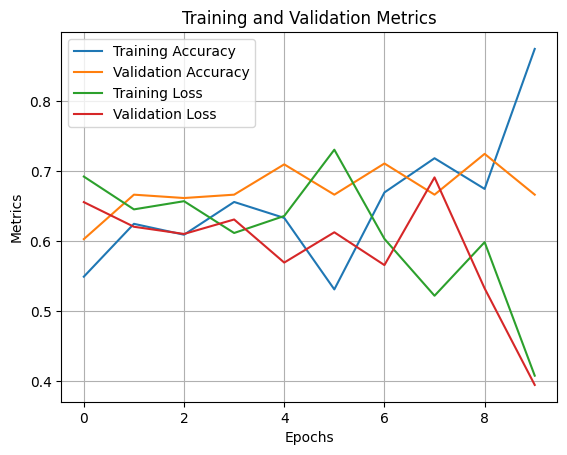

In [9]:
# Evaluate on validation data
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Plot training and validation metrics
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Metrics')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.grid(True)
plt.show()

## Test the Model with New Images

In [12]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess a new image
img_path = '/content/data/validation/cats/cat.1012.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict the class
prediction = model.predict(img_array)
if prediction[0][0] > 0.5:
    print("Predicted: Dog")
else:
    print("Predicted: Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted: Cat
